In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("spam.csv", encoding='latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df=df.rename(columns={"v1": "target", "v2": "text"})

In [8]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.replace({"target": {"ham": 0, "spam": 1}}, inplace=True)

C:\Users\chira\AppData\Local\Temp\ipykernel_18660\3526884525.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"target": {"ham": 0, "spam": 1}}, inplace=True)


In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['target'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5572 entries, 0 to 5571
Series name: target
Non-Null Count  Dtype
--------------  -----
5572 non-null   int64
dtypes: int64(1)
memory usage: 43.7 KB


In [12]:
df['target'].value_counts()    

target
0    4825
1     747
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x282a4b38590>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

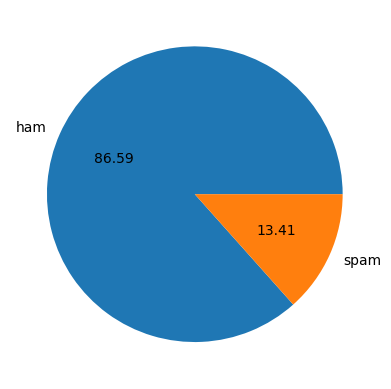

In [13]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

<AxesSubplot: xlabel='target'>

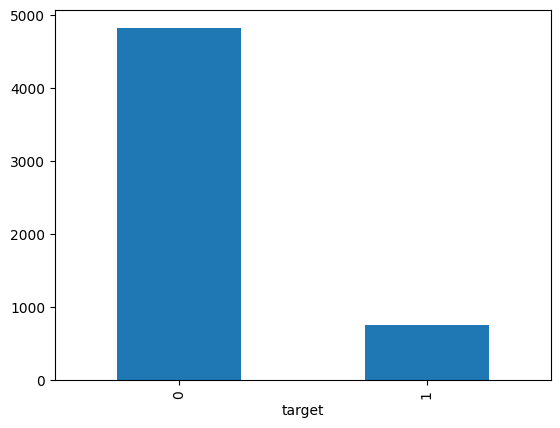

In [14]:
df['target'].value_counts().plot(kind='bar')

In [15]:
df['target'].describe()

count    5572.000000
mean        0.134063
std         0.340751
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: target, dtype: float64

In [16]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [18]:
df.drop_duplicates(keep='first', inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

In [21]:
import nltk

In [22]:
nltk.download('punkt')
stopwords=nltk.corpus.stopwords.words('english')
# stemmer=PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
df['num_chars']=df['text'].apply(len)

In [24]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target']==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chira\App

<AxesSubplot: ylabel='Count'>

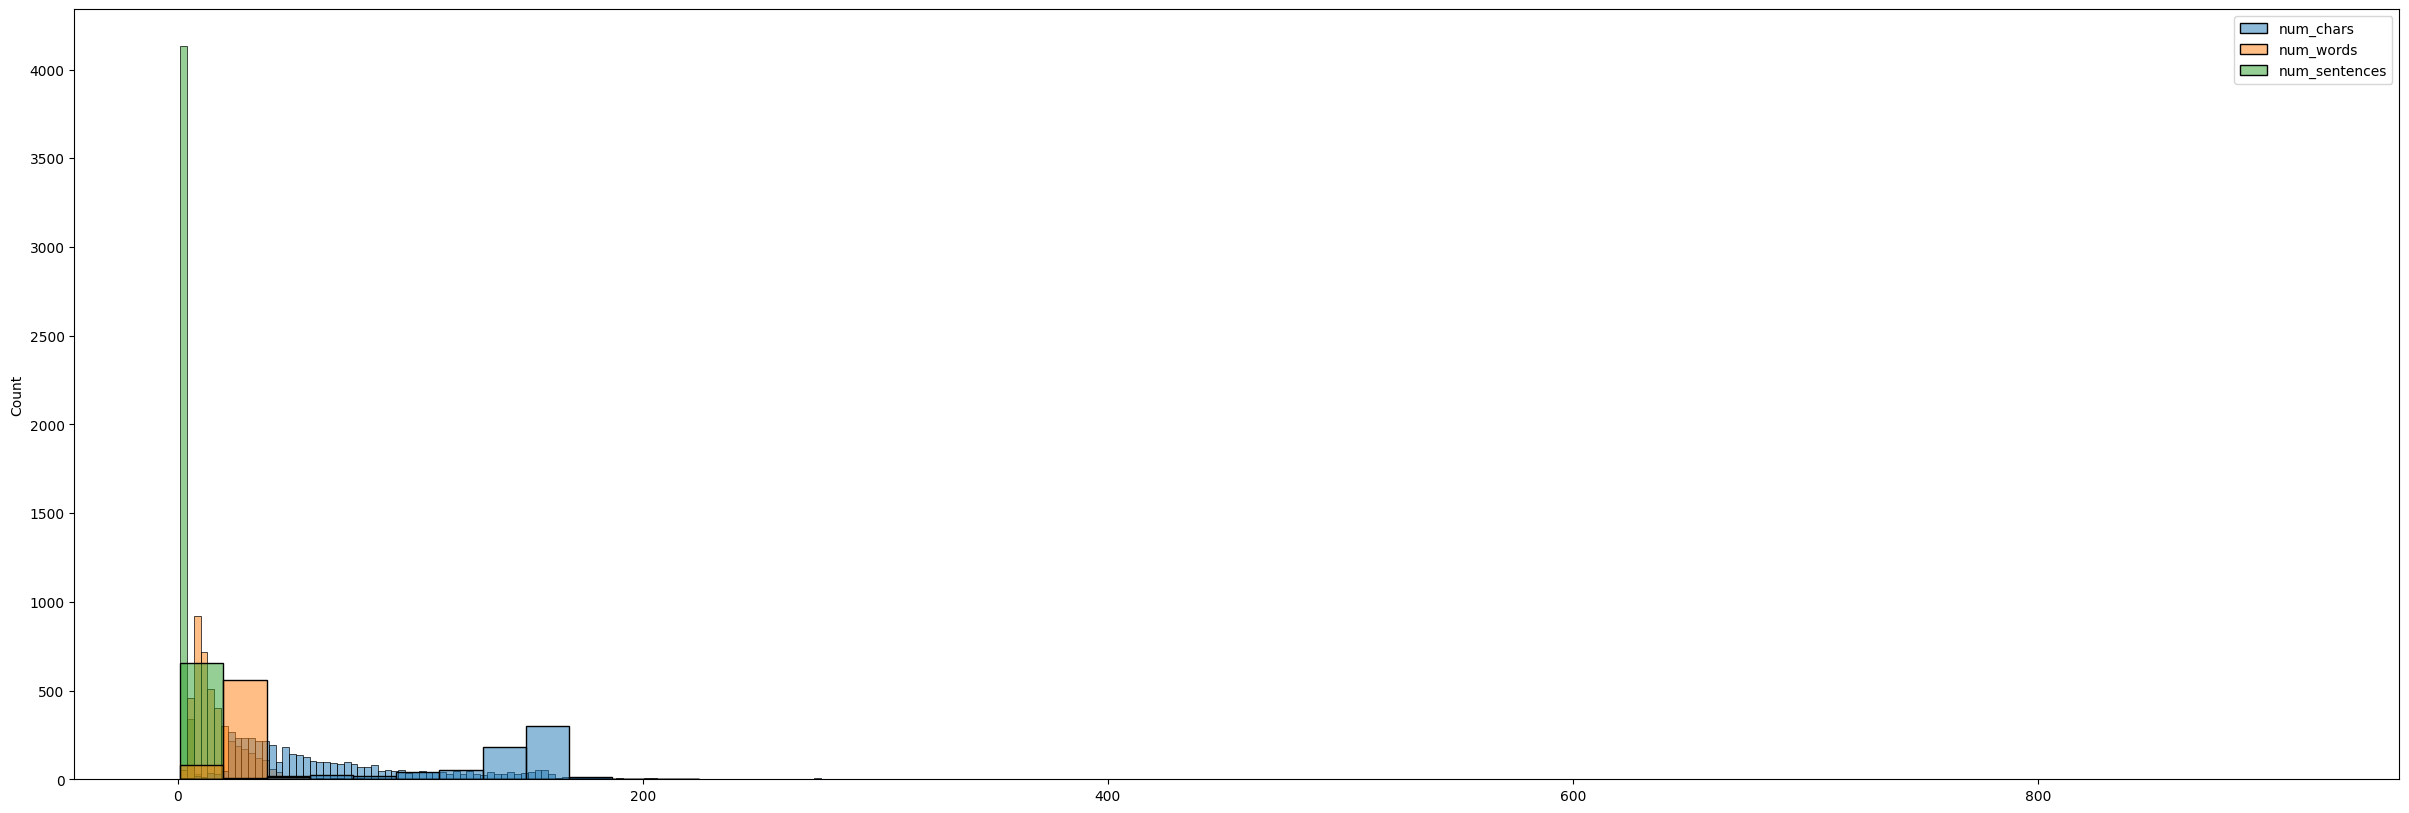

In [29]:
plt.figure(figsize=(30,10))
sns.histplot(df[df['target']==0][['num_chars', 'num_words', 'num_sentences']])
sns.histplot(df[df['target']==1][['num_chars', 'num_words', 'num_sentences']])

c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chira\App

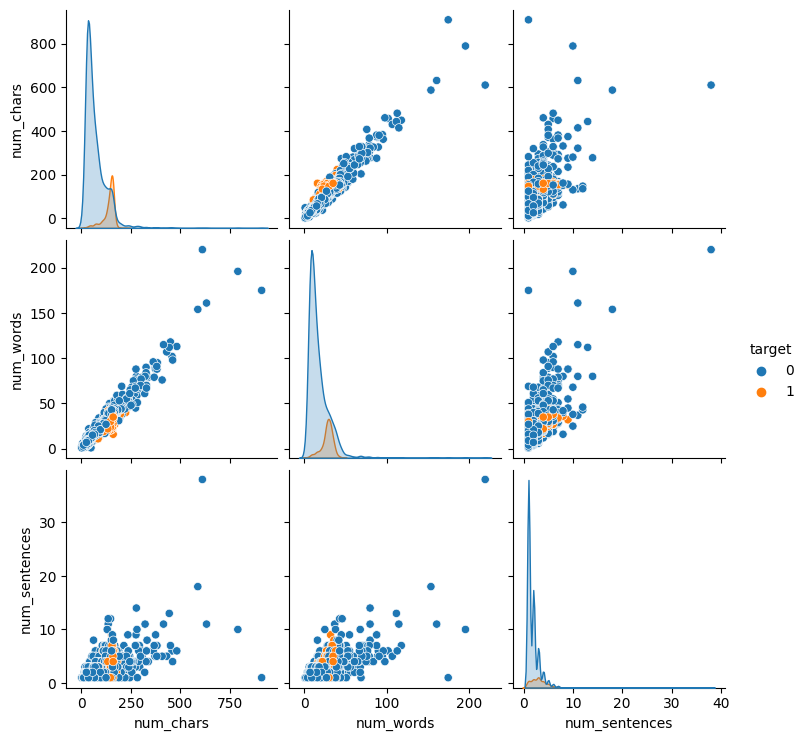

In [30]:
sns.pairplot(df, hue='target')

In [31]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [32]:
#Data processing
#lowercase
#tokenization
#remove special char
#remove stopwords
#stemming

In [33]:
def convert(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=text[:]
    text.clear()

    for word in y:
        if word.isalnum():
            word=word.strip()
            if word not in stopwords:
                text.append(stemmer.stem(word))

    return " ".join(text)


In [34]:
convert("   Hello World I am CHIRAG! %%%")

'hello world chirag'

In [35]:
df['new_text']=df['text'].apply(convert)

In [36]:
df.head()

,target,text,num_chars,num_words,num_sentences,new_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


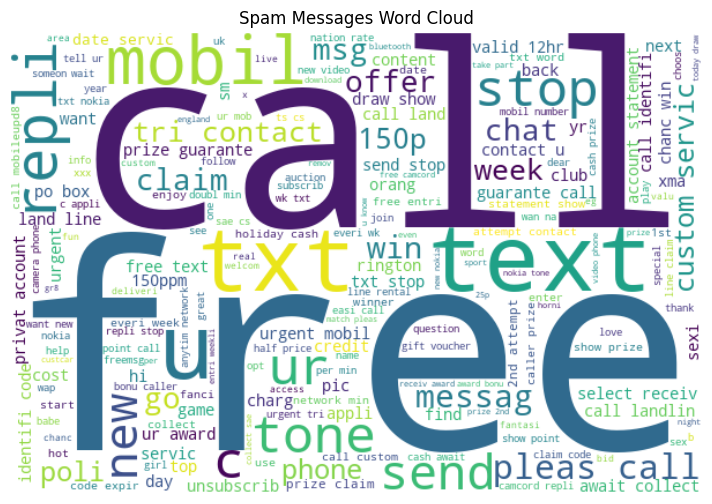

Text(0.5, 1.0, 'Ham Messages Word Cloud')

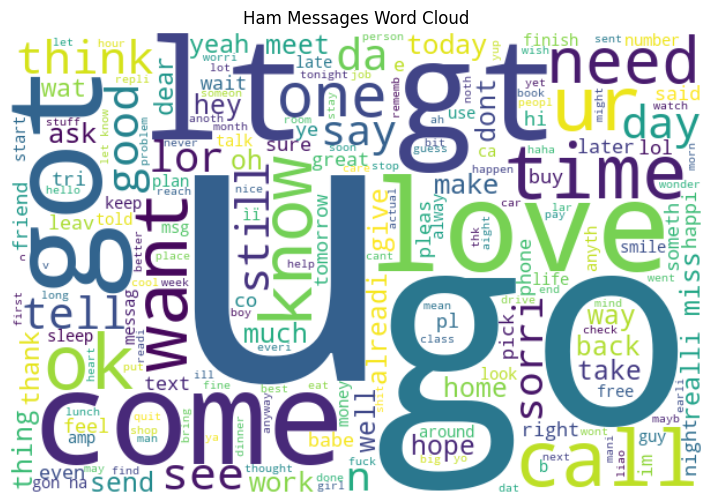

In [37]:
from wordcloud import WordCloud

# Word cloud for spam messages
spam_words = " ".join(df[df['target'] == 1]['new_text'])
spam_wc = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
plt.figure(figsize=(10,6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Messages Word Cloud')
plt.show()

# Word cloud for ham messages
ham_words = " ".join(df[df['target'] == 0]['new_text'])
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(10,6))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Messages Word Cloud')

In [38]:
from collections import Counter

# Get all words from spam messages
spam_words_list = " ".join(df[df['target'] == 1]['new_text']).split()

# Count word frequencies
spam_word_counts = Counter(spam_words_list)

# Get top 20 words and their counts
top_20_spam = spam_word_counts.most_common(20)

# Display as a DataFrame
top_20_df = pd.DataFrame(top_20_spam, columns=['Word', 'Count'])
print(top_20_df)

      Word  Count
0     call    320
1     free    191
2        2    155
3      txt    141
4     text    122
5        u    119
6       ur    119
7    mobil    114
8     stop    104
9    repli    103
10   claim     98
11       4     97
12   prize     82
13     get     74
14     new     64
15  servic     64
16    tone     63
17    send     60
18  urgent     57
19   nokia     57


In [39]:
from collections import Counter

# Get all words from spam messages
ham_words_list = " ".join(df[df['target'] == 0]['new_text']).split()

# Count word frequencies
ham_word_counts = Counter(ham_words_list)

# Get top 20 words and their counts
top_20_ham = ham_word_counts.most_common(20)

# Display as a DataFrame
top_20_df = pd.DataFrame(top_20_ham, columns=['Word', 'Count'])
print(top_20_df)

    Word  Count
0      u    883
1     go    404
2    get    349
3     gt    288
4     lt    287
5      2    284
6   come    275
7    got    236
8   know    236
9   like    234
10  call    233
11  time    219
12    ok    217
13  love    216
14  good    213
15  want    208
16    ur    197
17   day    190
18  need    170
19   one    165


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
cv = CountVectorizer()

# Fit and transform the new_text column
X = cv.fit_transform(df['new_text'])

# Example: show feature names and shape
print("Vocabulary size:", len(cv.get_feature_names_out()))
print("Shape of X:", X.shape)

Vocabulary size: 6708
Shape of X: (5169, 6708)


Accuracy: 0.97678916827853


Text(0.5, 1.0, 'Confusion Matrix (Logistic Regression)')

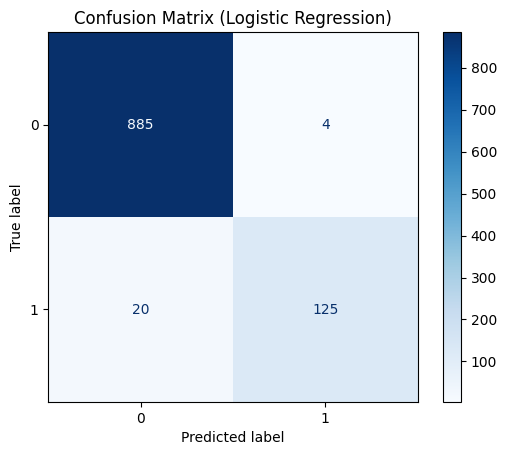

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Vectorize the text data
cv = CountVectorizer()
X = cv.fit_transform(df['new_text'])
y = df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')

In [42]:
output=model.predict(cv.transform(["WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,,,"]))

In [43]:
print("Prediction:", output)

Prediction: [1]


In [44]:
import pickle
pickle.dump(model, open('spam_model.pkl', 'wb'))
pickle.dump(cv, open('vectorizer.pkl', 'wb'))